In [11]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
# Helpers
import sys
sys.path.insert(0,'../../')
from helpers import *
from scipy.sparse import csr_matrix,save_npz,load_npz
import pickle

from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.metrics import classification_report

# Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [90]:
logloss = []
threshold = []
train_y = pd.read_csv('../data/train_Y.csv')
for i in [4]:
    y_true = []
    y_proba = []
    kf = LeaveOneOut()
    for train_index,test_index in kf.split(train_y): # for each cv round
        train_cv, test_cv = train_y.iloc[train_index], train_y.iloc[test_index]
        test_sample = test_cv['sample_name'].values[0]
        res = pd.read_pickle('LOO_CV_MAP_'+str(i)+'/'+test_sample+'.pkl')
        y_true.append(res['y_true'].values[0])
        y_proba.append(res['y_proba'].values[0])
    print(log_loss(y_true,y_proba))
    logloss.append(log_loss(y_true,y_proba))
    threshold.append(i)

0.3069802681783639


In [91]:
roc_auc_score(y_true,y_proba)

0.9444204152249135

In [43]:
x = np.arange(6)

In [18]:
logloss

[0.3786909257987265,
 0.3291108741923663,
 0.3069802681783639,
 0.6230474614826823,
 4.646097534632999,
 7.324830361554079]

In [56]:
x = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]

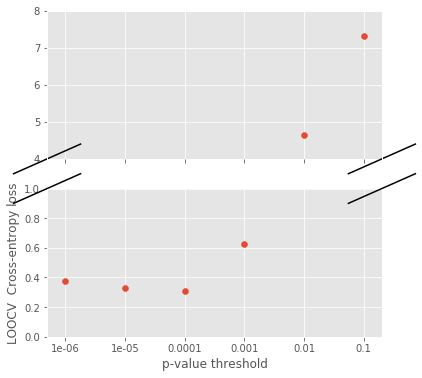

In [89]:
import matplotlib.ticker as plticker
f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize=(6,6))
# f.suptitle('Main title')
# plt.style('ggplot')
# plot the same data on both axes
ax.scatter(np.arange(6),logloss)
ax.set_xticklabels(labels = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
ax2.set_xlabel('p-value threshold')
ax2.set_ylabel('LOOCV  Cross-entropy loss')
# ax.set_ylabel('LOOCV log-loss')

ax2.scatter(np.arange(6),logloss)
ax2.set_xticklabels(labels = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])


# zoom-in / limit the view to different portions of the data
ax.set_xticks(np.arange(6))
ax2.set_xticks(np.arange(6))
ax2.set_ylim(0, 1)  # outliers only
ax.set_ylim(4, 8)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .1  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()
f.savefig('log_loss.png')

# fig,ax = plt.subplots(1,1)
# ax.set_xticks(np.arange(6))
# loc = plticker.MultipleLocator(base=0.1) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_locator(MaxNLocator(6))
# ax.set_xticks(x)
# plt.xlim(1e-6, 1e-1)
# ax.scatter(np.arange(6),logloss)
# ax.set_xticklabels(labels = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
# ax.set_xlabel('p-value threshold')
# ax.set_ylabel('LOOCV log-loss')

In [23]:
roc_auc_score(y_true,y_proba)

0.9444204152249135

In [4]:
y_true = []
y_proba = []
train_y = pd.read_csv('../data/train_Y.csv')
kf = LeaveOneOut()
for train_index,test_index in kf.split(train_y): # for each cv round
    train_cv, test_cv = train_y.iloc[train_index], train_y.iloc[test_index]
    test_sample = test_cv['sample_name'].values[0]
    res = pd.read_pickle('LOO_CV_MAP_5/'+test_sample+'.pkl')
    y_true.append(res['y_true'].values[0])
    y_proba.append(res['y_proba'].values[0])
print(roc_auc_score(y_true,y_proba))
print(log_loss(y_true,y_proba))

0.9340692827933311
0.3291108741923663


In [5]:
y_true = []
y_proba = []
train_y = pd.read_csv('../data/train_Y.csv')
kf = LeaveOneOut()
for train_index,test_index in kf.split(train_y): # for each cv round
    train_cv, test_cv = train_y.iloc[train_index], train_y.iloc[test_index]
    test_sample = test_cv['sample_name'].values[0]
    res = pd.read_pickle('LOO_CV_MAP_6/'+test_sample+'.pkl')
    y_true.append(res['y_true'].values[0])
    y_proba.append(res['y_proba'].values[0])
print(roc_auc_score(y_true,y_proba))
print(log_loss(y_true,y_proba))

0.8970686536646744
0.3786909257987265


In [6]:
y_true = []
y_proba = []
train_y = pd.read_csv('../data/train_Y.csv')
kf = LeaveOneOut()
for train_index,test_index in kf.split(train_y): # for each cv round
    train_cv, test_cv = train_y.iloc[train_index], train_y.iloc[test_index]
    test_sample = test_cv['sample_name'].values[0]
    res = pd.read_pickle('LOO_CV_MAP_3/'+test_sample+'.pkl')
    y_true.append(res['y_true'].values[0])
    y_proba.append(res['y_proba'].values[0])
print(roc_auc_score(y_true,y_proba))
print(log_loss(y_true,y_proba))

0.9698608052846807
0.6230474614826823


In [7]:
y_true = []
y_proba = []
train_y = pd.read_csv('../data/train_Y.csv')
kf = LeaveOneOut()
for train_index,test_index in kf.split(train_y): # for each cv round
    train_cv, test_cv = train_y.iloc[train_index], train_y.iloc[test_index]
    test_sample = test_cv['sample_name'].values[0]
    res = pd.read_pickle('LOO_CV_MAP_2/'+test_sample+'.pkl')
    y_true.append(res['y_true'].values[0])
    y_proba.append(res['y_proba'].values[0])
print(roc_auc_score(y_true,y_proba))
print(log_loss(y_true,y_proba))

0.9060779726329034
4.646097534632999


In [8]:
y_true = []
y_proba = []
train_y = pd.read_csv('../data/train_Y.csv')
kf = LeaveOneOut()
for train_index,test_index in kf.split(train_y): # for each cv round
    train_cv, test_cv = train_y.iloc[train_index], train_y.iloc[test_index]
    test_sample = test_cv['sample_name'].values[0]
    res = pd.read_pickle('LOO_CV_MAP_1/'+test_sample+'.pkl')
    y_true.append(res['y_true'].values[0])
    y_proba.append(res['y_proba'].values[0])
print(roc_auc_score(y_true,y_proba))
print(log_loss(y_true,y_proba))

0.7000334224598931
7.324830361554079
